<a href="https://colab.research.google.com/github/RusAl84/IntroML/blob/master/8_3_%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Логистическая регрессия
Логистическая регрессия похожа на линейную, но выход ее это не просто сумма произведений параметров и входов со смещением, а некоторая функция от этого. Применяют функцию под названием "сигмоида" или "логистическая функция", отсюда и название модели.

Сигмоида это функция вида: \\(f(x)= \frac{1}{1+e^{-x}}\\)

Нарисуем ее график, позаимствовав эту функцию, назвали `expit()`, из библиотеки [`scipy.special`](https://docs.scipy.org/doc/scipy/reference/special.html)  

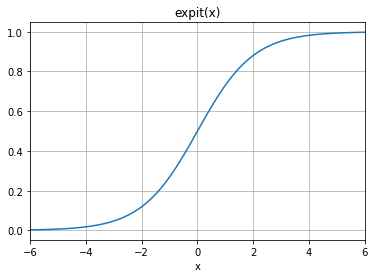

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit # подключаем функцию из библиотеки
x = np.linspace(-6, 6, 121) # диапазон по х
y = expit(x) # значение функции по у
plt.plot(x, y) #
plt.grid() #
plt.xlim(-6, 6)#
plt.xlabel('x')#
plt.title('expit(x)')#
plt.show()#

Как нетрудно убедиться значения этой функции всегда лежат в пределах от 0 до 1, в нуле принимает значение 0.5. Если бы мы просто в линейной регрессии добавили эту функцию, то никогда не смогли бы моделировать зависимости, у которых выходная переменная больше 1 или меньше 0. Поэтому в логистической регрессии требуют, чтобы и указания учителя были в диапазоне 0...1.

Выход же логистической регрессии: 

\\(\overrightarrow{y}=f(A*\overrightarrow{x}+\overrightarrow{b})\\), 

где сигмоида применяется поэлементно к каждому компоненту вектора.

Для задач классификации, можно существенно изменить функцию ошибки. Давайте будем рассматривать только бинарную (двухклассовую) классификацию, и будем один класс обозначать величиной 0, второй - величиной 1. Тогда выход логистической регрессии (он от 0 до 1) можно интерпретировать как уверенность модели в том, что вход принадлежит к одному из классов. Выход ближе к нулю - принадлежит к классу 0, выход ближе к 1 - принадлежит классу 1.



Чтобы понять функцию ошибки будем рассуждать так:

Давайте посчитаем, насколько **правдоподобно**, что выход описывает заданный класс: 
* если класс должен быть 1, то правдоподобие для него это само значение выхода модели y (должно быть 1, а получилось y, например выход у=0.3 - правдоподобие = 0.3 - совершенно не правдоподобно, очень маленькая уверенность, что класс 1; выход у=0.9 - правдоподобие = 0.9 - правдоподобно, большая уверенность в том, что класс 1).
* если класс должен быть 0, то правдоподобие для него это единица минус значение выхода модели y (должно быть 0, а получилось y, например выход у=0.3 - правдоподобие 1-0.3=0.7 - правдоподобно, большая уверенность в том, что класс 0; выход у=0.9 - правдоподобие 1-0.9=0.1 - совершенно не правдоподобно, очень маленькая уверенность, что класс 0).




Выше приведены рассуждения для одного примера, если их несколько, то найдем произведение правдоподобий для каждого примера.

Например:
* для хорошего классификатора: получились выходы 0.1, 0.9, 0.8, а должны были получиться 0, 1, 1. Общее правдоподобие (1-0.1) * 0.9 * 0.8 = 0.648 довольно большое;
* для плохого классификатора: получились выходы 0.4, 0.6, 0.5, а должны были получиться 0, 1, 1. Общее правдоподобие (1-0.4) * 0.6 * 0.5 = 0.18 существенно меньше;
* для классификатора-врунишки, который все классы путает: получились выходы 0.7, 0.2, 0.1, а должны были получиться 0, 1, 1. Общее правдоподобие (1-0.7) * 0.2 * 0.1 = 0.006 очень маленькое.

Но работать с произведением маленьких чисел, когда их много (в пакете примеров может быть довольно много), очень сложно, поэтому от значений правдоподобия переходят к его логарифму. Тогда числа по модулю уже не будут маленькими (но будут отрицательными), а произведение превратится в сумму (вспомните свойства логарифма).

Значения, которые мы подставляли для правдоподобия зависят от того, какой класс должен был получиться. Чтобы эти условия "если..." реализовать в одной формуле, можно поступить так:
- когда класс равен 0 нам нужно использовать \\(ln(1-y)\\), когда класс равен 1 нам нужно использовать  \\(ln(y)\\).
- запишем такую формулу: \\(t*ln(y)+(1-t)*ln(1-y)\\), где t (0 или 1) наш класс.   
- тогда при t=0 остается второе слагаемое \\(ln(1-y)\\), а при t=1 остается только первое слагаемое \\(ln(y)\\), как мы и хотели.

Итак, общее правдоподобие нашей модели:

$ E=\sum_{i=1}^{P} (t(x_i)*ln(y(x_i))+(1-t(x_i))*ln(1-y(x_i))\\
x_i : i-ый\ пример\ входа\\
t(x_i) : указание\ учителя\ для\ него\\
y(x_i) : выход\ модели\ для\ него \\ $

Правдоподобие нужно максимизировать, поменяем знак, можно минимизировать. Функция ошибки здесь это минус правдоподобие модели. Похожую формулу можно записать и для случая, когда классов больше чем два, но сейчас мы не будем этого делать. 



В функцию ошибки часто добавляют дополнительные члены, регуляризаторы, которые вводят некоторые ограничения, например, чтобы величина параметров была не очень большая. Это бывает и полезно и вредно для обучения. Мы не будем трогать параметры по умолчанию, пока не придется.

Обучается такая модель методами на основе градиентного спуска (чистым градиентным спуском пользуются редко, обычно используют всякие его модификации, в которых, например, могут управлять величиной шага обучения или др.). Какой именно метод используется здесь для наших уроков не принципиально. 



В `sklearn` логистическая регрессия задается с помощью [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) у которой есть такие же методы как и у `LinearRegression()` и некоторые специфичные аргументы:
* tol - точность до которой нужно обучать модель
* C - 1/коэффициент важности регуляризуещего члена в функции ошибки
* penalty -  вид регуляризации, 'none' если хотим отключить регуляризацию (по умолчанию включена)
* solver - название метода обучения, не будем трогать.
* max_iter - максимальное количество итераций для обучения

*Примечание: формулы приведенные для [`LogisticRegression`](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) в документации, отличаются от наших, поскольку они выведены для случая когда желаемый выход +1 или -1, а в наших 0 либо 1.* 

Для логистической регрессии метод `predict()` возвращает классы (0 или 1 в нашем случае).

Чтобы вернуть выход используем метод `predict_proba()`. Он вернет величины правдоподобия для класса 0 (единица минус выход) и 1 (выход). 



<ipython-input-7-9016004adb05>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (X > 0).astype(np.float) # класс 1 если больше нуля, 0 иначе, преобразуем в тип float


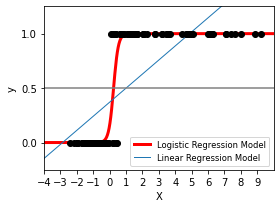

In [ ]:
# import numpy as np #
import matplotlib.pyplot as plt #

from sklearn import linear_model #
from scipy.special import expit # функция для сигмоиды

# создадим данные: два отрезка на уровне 0 и 1

n_samples = 100 # число примеров
np.random.seed(0) # инициализация генератора случайных чисел
X = 1*np.random.normal(size=n_samples) # случаные числа по х, с нормальным законом распределения
y = (X > 0).astype(np.float) # класс 1 если больше нуля, 0 иначе, преобразуем в тип float
X[X > 0] *= 4 # умножим примеры входов из класса 1 на 4
X += .3 * np.random.normal(size=n_samples) # добавим ко всем примерам входа шум - случаные числа не очень большого разброса

X = X[:, np.newaxis] # сделаем столбец, добавив новое измерение к массиву, был одномерный станет двумерный. Можно было бы использовать reshape как раньше

# Обучение классификатора
log_reg = linear_model.LogisticRegression(C=1e5, max_iter=200) # создаем логистическую регрессию, C ставим побольше, это значит регуляризация будет влиять мало на результат
log_reg.fit(X, y) # обучаем модель, мы не стали разделять на обучающие и тестовые данные сейчас.

# рисуем результат
plt.figure(1, figsize=(4, 3)) # 
plt.clf() #
plt.scatter(X.ravel(), y, color='black', zorder=20) # ravel() вытягивает массив, превращая его в одномерный

X_test = np.linspace(-5, 10, 300) # вот теперь создадим тестовые примеры входов

# посчитаем выход модели
loss = expit(X_test * log_reg.coef_ + log_reg.intercept_).ravel() # вручную
loss1 = log_reg.predict_proba(X_test[:, np.newaxis])[:,1].ravel() # через predict_proba, берем второй столбец (индекс 1) , чтобы сам выход вернуть
plt.plot(X_test, loss1, color='red', linewidth=3) #

# сравним с линейной регрессией
ols = linear_model.LinearRegression() # линейная регрессия
ols.fit(X, y) # обучаем ее
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)

# рисуем
plt.axhline(.5, color='.5') #

plt.ylabel('y') #
plt.xlabel('X') #
plt.xticks(range(-5, 10)) #
plt.yticks([0, 0.5, 1]) #
plt.ylim(-.25, 1.25) #
plt.xlim(-4, 10) #
plt.legend(('Logistic Regression Model', 'Linear Regression Model'), #
           loc="lower right", fontsize='small') #
plt.tight_layout() #
plt.show() #

## Понятие разделяющей поверхности
Выше мы рассмотрели линейную и логистическую регрессии. Если мы используем  их для классификации, то вводится некоторое правило, как относить выходы к классам, например для двух классов для линейной регрессии можно считать так: если выход меньше нуля, то первый класс, если больше - второй. В логистической регрессии принято выбирать такой класс, для которого уверенность максимальна. Как именно относить выходы к классам это наш выбор, в некоторых библиотеках реализована возможность задать порог для такого отнесения, в некоторых нет, тогда используются наперед заданные значения. 

Давайте зададимся таким вопросом. Пусть решаем задачу бинарной классификации, есть примеры входов в двумерном пространстве, и мы обучили на них линейную и логистическую регрессии. Если мы, после обучения, проверим классы выдаваемые этими моделями для всех точек двумерной плоскости, то какую картину мы увидим? Давайте нарисуем.

Обученные параметры b=[-0.00616075] a=[[0.02222096 0.02578357]]


(-40.0, 40.0)

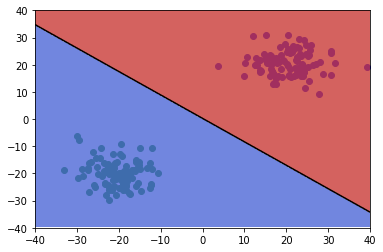

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model #

np.random.seed(42) # начало генератора случайных чисел, чтобы после перезапуска были одинаковые
N=100 # число точек в одном классе

# первый класс, случайные точки вокруг (-20, -20) выход = -1
x1 = -20+5*np.random.randn(N, 1) #
y1 = -20+5*np.random.randn(N, 1) #
z1=-1*np.ones((100,1)) #
# второй класс, случайные точки вокруг (+20, +20) выход = +1
x2 = 20+5*np.random.randn(N, 1) #
y2 = 20+5*np.random.randn(N, 1) #
z2=+1*np.ones((100,1)) #

# большой выброс, раскомментируйте для теста
#x1[0]=+1000
#y1[0]=+1000

# Объединяем массивы в один 
Input=np.hstack((np.vstack((x1, x2)),np.vstack((y1 , y2))))
Output=np.vstack((z1,z2))
#print(Input.shape)
#print(Output.shape)

fig, ax = plt.subplots()

# рисуем обучающие точки своим цветом
ax.scatter(Input[0:N-1,0],Input[0:N-1,1],color='green')
ax.scatter(Input[N:,0],Input[N:,1],color='blue')

# создаем и обучаем линейную регрессию
linr = linear_model.LinearRegression() # создадим ее. normalize=False если хотим без нормализации
linr.fit(Input, Output) # обучим модель, принудительно переформатировав размеры массивов
print('Обученные параметры b={d[0]} a={d[1]}'.format(d=(linr.intercept_, linr.coef_))) #

out_pred=linr.predict(Input)# посчитаем выход модели

# Если выход меньше нуля - принимаем за первый класс, если больше - за второй
# найдем ошибки, т.е. не совпадение между истинными классами и полученными моделью 
err1=(out_pred>0) & (Output==-1)# думаем что второй, а на самом деле первый класс
err2=(out_pred<0) & (Output==+1)# думаем что первый, а на самом деле второй класс
err1=err1[:,0]
err2=err2[:,0]

# нарисуем ошибки
ax.scatter(Input[err1,0],Input[err1,1],color='yellow',marker='x')
ax.scatter(Input[err2,0],Input[err2,1],color='magenta',marker='x')

# возьмем много точек плоскости
h=0.2
x_min,y_min=Input.min(axis=0)-10
x_max, y_max=Input.max(axis=0)+10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # точки плоскости из равномерной сетки
Input_test=np.c_[xx.ravel(), yy.ravel()]
#print(Input.shape)

# посчитаем для них выходы обученной линейной регрессии
zz = linr.predict(Input_test)
zz = zz.reshape(xx.shape)
zz[zz>0]=1 # больше нуля - второй класс
zz[zz<0]=-1 # меньше нуля - первый класс
ax.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8); # рисуем цветом выходы для всех точек плоскости

# рисуем прямую
xxx=np.arange(x_min,x_max,h)
yyy=-(linr.intercept_[0] + linr.coef_[0][0]*xxx)/linr.coef_[0][1] # x2=-(a1*x1+b)/a2

ax.plot(xxx,yyy,color='black');
ax.set_xlim([-40, 40])
ax.set_ylim([-40, 40])

Мы видим, что плоскость разделилась на две области, в одной все точки приняты за первый класс, в другой - за второй. Если присмотреться, то граница раздела между этими областями это **прямая линия**. Какие бы данные вы не подавали, как бы не обучали линейную регрессию, она всегда будет разбивать плоскость на две части - полуплоскости (для бинарной классификации). 

Аналогично в многомерном случае, но теперь граница раздела будет не прямой линией, а гиперплоскостью. Такая граница называется **разделяющая поверхность** и для линейной регрессии является гиперплоскостью. Можете убедиться в этом, ведь уравнение этой поверхности - границы раздела - это условие что выход равен нулю. Подставьте в уравнение выхода линейной регрессии и увидите, что получилось уравнение гиперплоскости. **В линейной регрессии разделяющая поверхность - линейная**, ее можно нарисовать.

А что для логистической регрессии? Постройте аналогично, и увидите, что для нее, хотя выход логистической регрессии нелинеен по входам, разделяющая поверхность тоже линейная. Сама поверхность может отличаться от поверхности для линейной регрессии, но все равно она является линейной. 

Обученные параметры b=[-0.0643596] a=[[0.25333358 0.27715147]]


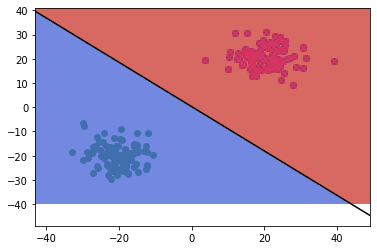

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model #

np.random.seed(42) # начало генератора случайных чисел, чтобы после перезапуска были одинаковые
N=100

x1 = -20+5*np.random.randn(N, 1) #
y1 = -20+5*np.random.randn(N, 1) #
z1=0*np.ones((100,1)) # классы должны быть 0 или 1

x2 = 20+5*np.random.randn(N, 1) #
y2 = 20+5*np.random.randn(N, 1) #
z2=1*np.ones((100,1)) # классы должны быть 0 или 1

Input=np.hstack((np.vstack((x1, x2)),np.vstack((y1 , y2))))
Output=np.vstack((z1,z2))
#print(Input.shape)
#print(Output.shape)

fig, ax = plt.subplots()

ax.scatter(Input[0:N-1,0],Input[0:N-1,1],color='green')
ax.scatter(Input[N:,0],Input[N:,1],color='blue')

logr = linear_model.LogisticRegression() # 
logr.fit(Input, Output.ravel()) # обучим модель, 
print('Обученные параметры b={d[0]} a={d[1]}'.format(d=(logr.intercept_, logr.coef_))) #
out_pred=logr.predict(Input)# посчитаем выход модели
out_pred

# в логистической регресии predict возвращает классы, так что не надо самим относить выходы к классам
# больше 0.5 класс 1, меньше 0.5 класс 0.
err1=(out_pred==1) & (Output==0)
err2=(out_pred==0) & (Output==1)
err1=err1[:,0]
err2=err2[:,0]

ax.scatter(Input[err1,0],Input[err1,1],color='yellow',marker='x')
ax.scatter(Input[err2,0],Input[err2,1],color='magenta',marker='x')

h=0.2
x_min,y_min=Input.min(axis=0)-10
x_max, y_max=Input.max(axis=0)+10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Input_test=np.c_[xx.ravel(), yy.ravel()]
#print(Input.shape)

zz = logr.predict(Input_test)
zz = zz.reshape(xx.shape)
# в логистической регресии predict возвращает классы, так что не надо самим относить выходы к классам
#zz[zz>0]=1
#zz[zz<0]=-1
ax.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8);

xxx=np.arange(x_min,x_max,h)
# все равно это прямая линия, но возможно с другими коэффициентами
yyy=-(logr.intercept_[0] + logr.coef_[0][0]*xxx)/logr.coef_[0][1]

ax.plot(xxx,yyy,color='black');

### Унитарное кодирование
Для случаев трех и более классов, разделяющая поверхность будет кусочно-линейной, состоять из частей гиперплоскостей. Постройте самостоятельно для случая трех классов.

![img](https://russianblogs.com/images/10/0915e47fdf2ff18094dfb64238f713d2.JPEG) 

Чтобы в линейной регрессии закодировать три и более класса, можно поступить так: давайте сделаем выход многомерным, размерность его равна числу классов; пусть все элементы вектора указаний учителя равны нулю кроме одного. Элемент вектора указаний учителя с номером, совпадающим с номером класса, равен 1. Такое кодирование называется **one-hot** кодирование (иногда бинарное или унитарное кодирование). Например, для трех классов можно закодировать указания учителя так: первый класс - вектор (1, 0, 0);  второй класс - вектор (0, 1, 0); третий класс - вектор (0, 0, 1). Для линейной регрессии можно использовать и другие числа, например: первый класс - вектор (+1, -1, -1);  второй класс - вектор (-1, +1, -1); третий класс - вектор (-1, -1, +1) или аналогичные. Для логистической регрессии значения выходов и указаний учителя должны быть от 0 до 1. 

Относить выход к классу можно, как вариант, по максимальной близости вектора выхода к заданным векторам классов, например: выход (0.9, 0.1, 0.1) ближе всех к (1, 0, 0), а значит относится к первому классу. Можно придумать и другие способы. 

Вопрос, а как бы вы интерпретировали выход (0.5, 0.5, 0) ? 

# Обсуждение и задания
Посчитайте самостоятельно сколько правильно и неправильно угаданных классов, если считать истинный класс 0 если X меньше и класс 1 если больше порога. Сравните количество ошибок для логистической и линейной регрессии. Для линейной регрессии считать класс 1 если выход больше 0.5 и 0 если меньше. 

Придумайте данные, для которых и логистическая регрессия будет работать плохо и покажите это.

Посмотрите как влияет аргумент max_iter на качество регрессии.

Онлайн визуализацию для линейных моделей можно найти здесь 

http://vision.stanford.edu/teaching/cs231n-demos/linear-classify/ 